## Примерный подход к решению кейса
1. Обработка описаний поручений:

- Создать систему для объединения синонимичных формулировок. Можно использовать алгоритмы Word2Vec, TF-IDF для классификации описаний.
- Выделить общие типы поручений с использованием алгоритмов (например, K-means) для  группировки схожих поручений, что упростит процесс их назначения подходящим командам.

2. Анализ навыков героев:
- Создать профиль каждого героя на основе его опыта, навыков и отзывов. Использовать данные из дневников для определения его сильных и слабых сторон. Например, если герой часто выполняет задания, связанные с определенным типом монстра, это может быть учтено при назначении его на аналогичные поручения. Присваивать вес каждому навыку героя, учитывая скорость выполнения задания и оценки от заказчиков. Чем выше оценка и скорость выполнения, тем более опытен герой в этом направлении.

3. Формирование команд:
- Задача Аркаши – находить баланс между командной численностью и эффективностью. Это можно решить с помощью алгоритма оптимизации, который будет назначать оптимальные команды для максимизации общей выручки.
- Использовать модель машинного обучения для предсказания вероятности успеха команды. Модель может учитывать сложность задания, навыки героев, предыдущий опыт, оценки и затраченное время. 

Создадим диаграмму для визуализации таблиц и их зависимостей.

![diagram](tables.png)

In [1]:
# Cкачиваем необходимые библиотеки для работы
#!pip install pandas numpy matplotlib seaborn sentence_transformers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Записываем исходные данные в датафреймы
cases = pd.read_csv('cases.csv', sep=';')
diaries = pd.read_csv('diaries.csv', sep=';')
marks = pd.read_csv('marks.csv', sep=';')

In [4]:
# Выводим столбцы датафреймов
print(cases.columns)
print(diaries.columns)
print(marks.columns)

Index(['﻿Номер поручения', 'Заказчик', 'Дата поручения', 'Выполнено',
       'Дата выполнения', 'Затрачено дней', 'Сумма вознаграждения',
       'Описание'],
      dtype='object')
Index(['Номер поручения', 'Герой', 'Запись в дневнике', 'Затрачено часов',
       'Роль'],
      dtype='object')
Index(['Номер поручения', 'Герой', 'Оценка за качество', 'Оценка по срокам',
       'Оценка за вежливость'],
      dtype='object')


In [5]:
# Проверям датафрейм на наличие NaN (не упускаем из внимания, что это просто могут быть невыполненные поручения)
print(cases.isna().sum(),'\n')
print(marks.isna().sum(),'\n')
print(diaries.isna().sum())

Номер поручения         0
Заказчик                 0
Дата поручения           0
Выполнено                0
Дата выполнения         19
Затрачено дней          19
Сумма вознаграждения     0
Описание                 0
dtype: int64 

Номер поручения         0
Герой                   0
Оценка за качество      0
Оценка по срокам        0
Оценка за вежливость    0
dtype: int64 

Номер поручения      0
Герой                0
Запись в дневнике    0
Затрачено часов      0
Роль                 0
dtype: int64


In [6]:
# Выведем невыполненные поручения
cases[cases['Выполнено'] == 'нет']

,﻿Номер поручения,Заказчик,Дата поручения,Выполнено,Дата выполнения,Затрачено дней,Сумма вознаграждения,Описание
56,11056,Мария,1053-09-06,нет,NaN,NaN,23500,По дороге из деревни у меня пропала драгоценно...
134,11134,Иван,1053-09-04,нет,NaN,NaN,27500,В пещере появвилось огромное каменное чудовище...
143,11143,Егор,1053-10-18,нет,NaN,NaN,10500,В пещере завёлся дракон. Нужно его убить. Это ...
161,11161,Эмилио,1053-10-03,нет,NaN,NaN,7500,В городе у меня потерялся рюкзак. Нужно найти ...
218,11218,Олег,1053-10-01,нет,NaN,NaN,16000,Недалеко от города монстры похитили путников. ...
232,11232,Бабушка Синь,1053-10-22,нет,NaN,NaN,17500,В деревне монстры похитили путников. Нужно спа...
234,11234,Олег,1053-10-24,нет,NaN,NaN,17000,В лесу по дороге от пещеры заметили разбойнико...
285,11285,Чарли,1053-09-30,нет,NaN,NaN,5000,В городе у меня потерялся рюкзак. Нужно найти ...
306,11306,Олег,1053-11-15,нет,NaN,NaN,17000,В деревне монстры похитили путников. Нужно спа...
310,11310,Надя,1053-09-24,нет,NaN,NaN,5000,По дороге из деревни монстры похитили путников...


In [7]:
# Удостоверимся, что по невыполненным поручениям нет записей в дневниках и оценок
print(diaries[diaries['Номер поручения'].isin(cases[cases['Выполнено'] == 'нет'])])
print(marks[marks['Номер поручения'].isin(cases[cases['Выполнено'] == 'нет'])])

Empty DataFrame
Columns: [Номер поручения, Герой, Запись в дневнике, Затрачено часов, Роль]
Index: []
Empty DataFrame
Columns: [Номер поручения, Герой, Оценка за качество, Оценка по срокам, Оценка за вежливость]
Index: []


In [8]:
#!pip install -U sentence-transformers

### Обработка описаний поручений

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


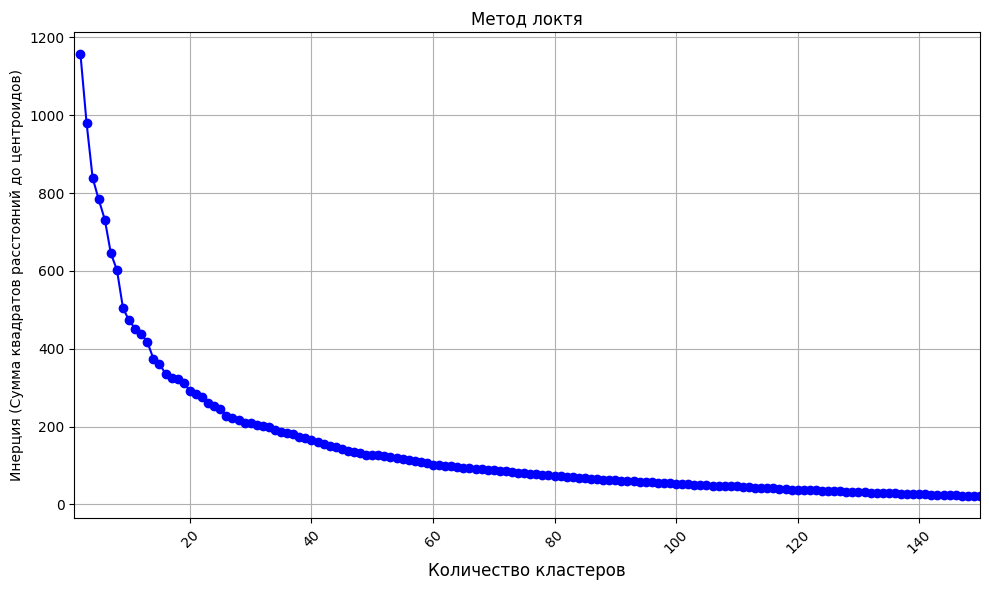

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer

task_descriptions = cases['Описание']

# Создание эмбеддингов с использованием Sentence-BERT
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(task_descriptions)

# Определение диапазона кластеров
# Максимальное количество кластеров не должно превышать (n_samples - 1)
n_samples = len(task_descriptions)

max_clusters = 150
range_n_clusters = list(range(2, max_clusters + 1))  # 2 до max_clusters включительно

# Листы для хранения результатов
inertia = []

# Перебираем различные количества кластеров и считаем метрики
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Метод локтя: инерция
    inertia.append(kmeans.inertia_)
    
# Создание графика
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# Метод локтя
ax1.plot(range_n_clusters, inertia, 'o-', color='blue')
ax1.set_title("Метод локтя")
ax1.set_xlabel("Количество кластеров", fontsize=12)
ax1.set_ylabel("Инерция (Сумма квадратов расстояний до центроидов)", fontsize=10)
ax1.grid(True)


# Настройка диапазона осей и увеличение шрифта
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlim(1, 150)

plt.tight_layout()
plt.show()

Исходя из сгиба графика и анализа кластеров, оптимальное количество кластеров примерно равно 10.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords

# загрузка стоп-слов
nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

# Преобразование текстов в числовые векторы с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words=russian_stopwords)  
X = vectorizer.fit_transform(task_descriptions)

n_clusters = 10

# Выполнение кластеризации с заданным количеством кластеров
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Группировка заданий по кластерам
clustered_tasks = {}
for i, label in enumerate(cluster_labels):
    if label not in clustered_tasks:
        clustered_tasks[label] = []
    clustered_tasks[label].append(task_descriptions[i])

# Вывод группированных заданий по порядку кластеров
for cluster in sorted(clustered_tasks.keys()):
    print(f"Кластер {cluster}:")
    for task in clustered_tasks[cluster]:
        print(f"  - {task}")

Кластер 0:
  - В деревне у меня потерялся рюкзак. Нужно найти его как можно скорее.
  - В городе у меня пропал рюкзак. Нужно найти его как можно скорее.
  - Недалеко от города у меня был украден рюкзак. Нужно вернуть его как можно скорее.
  - В деревне у меня пропал рюкзак. Нужно найти его как можно скорее.
  - В городе у меня потерялся рюкзак. Нужно вернуть его как можно скорее.
  - В городе у меня пропал рюкзак. Нужно вернуть его как можно скорее.
  - В городе у меня был украден рюкзак. Нужно вернуть его как можно скорее.
  - Недалеко от города у меня был украден рюкзак. Нужно вернуть его как можно скорее.
  - В городе у меня пропал рюкзак. Нужно вернуть его как можно скорее.
  - В городе у меня потерялся рюкзак. Нужно найти его как можно скорее. Проверьте все места, где он мог быть оставлен.
  - В городе у меня потерялся рюкзак. Нужно найти его как можно скорее.
  - Недалеко от города у меня был украден рюкзак. Нужно найти его как можно скорее.
  - В деревне у меня был украден рюкза

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vladislavgriaztsov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Анализ навыков героев

Необходимо найти среднюю оценку каждого героя и к таблице marks добавить номер кластера к которому относится задание. 


In [11]:
cluster_df = pd.DataFrame([
    {'description': task, 'cluster': cluster} 
    for cluster, tasks in clustered_tasks.items() 
    for task in tasks
])

cases.rename(columns={'Описание': 'description'}, inplace=True)
# Добавляем номер кластера к cases
cases = cases.merge(cluster_df, on='description', how='left')
cases

,﻿Номер поручения,Заказчик,Дата поручения,Выполнено,Дата выполнения,Затрачено дней,Сумма вознаграждения,description,cluster
0,11000,Анна,1051-08-11,да,1051-08-21,4.0,6000,В лесу по дороге от пещеры звери нападают на л...,9
1,11000,Анна,1051-08-11,да,1051-08-21,4.0,6000,В лесу по дороге от пещеры звери нападают на л...,9
2,11001,Мария,1051-07-09,да,1051-09-02,2.0,20000,В лесу по дороге от пещеры были замечены разбо...,3
3,11002,Эмилио,1053-10-05,да,1053-10-20,7.0,22500,По дороге из деревни монстры похитили путников...,8
4,11002,Эмилио,1053-10-05,да,1053-10-20,7.0,22500,По дороге из деревни монстры похитили путников...,8
...,...,...,...,...,...,...,...,...,...
3027,11497,Леонтия,1053-06-13,да,1053-07-10,4.0,8000,В лесу по дороге от пещеры монстры нападают на...,9
3028,11498,Мария,1052-10-18,да,1052-12-16,2.0,28000,В лесу около деревни разбойники нападают на лю...,9
3029,11498,Мария,1052-10-18,да,1052-12-16,2.0,28000,В лесу около деревни разбойники нападают на лю...,9
3030,11499,Олег,1053-07-08,да,1053-07-15,4.0,16500,В лесу недалеко от города были замечены разбой...,3


In [12]:
# Вычисляем среднюю оценку по каждому поручению
marks['Средняя оценка'] = marks.iloc[:,2:5].mean(axis=1).round(2)
marks

,Номер поручения,Герой,Оценка за качество,Оценка по срокам,Оценка за вежливость,Средняя оценка
0,11000,Мартин,4,3,4,3.67
1,11001,Альфред,5,5,4,4.67
2,11002,Мартин,5,4,4,4.33
3,11003,Бендер,2,4,3,3.00
4,11004,Юлия,4,4,5,4.33
...,...,...,...,...,...,...
495,11495,Синеглазый,3,4,4,3.67
496,11496,Юлия,3,3,4,3.33
497,11497,Пастушок,5,3,5,4.33
498,11498,Мартин,4,4,4,4.00


In [13]:
cases.rename(columns={'﻿Номер поручения': 'task_id'}, inplace=True)
cases

,task_id,Заказчик,Дата поручения,Выполнено,Дата выполнения,Затрачено дней,Сумма вознаграждения,description,cluster
0,11000,Анна,1051-08-11,да,1051-08-21,4.0,6000,В лесу по дороге от пещеры звери нападают на л...,9
1,11000,Анна,1051-08-11,да,1051-08-21,4.0,6000,В лесу по дороге от пещеры звери нападают на л...,9
2,11001,Мария,1051-07-09,да,1051-09-02,2.0,20000,В лесу по дороге от пещеры были замечены разбо...,3
3,11002,Эмилио,1053-10-05,да,1053-10-20,7.0,22500,По дороге из деревни монстры похитили путников...,8
4,11002,Эмилио,1053-10-05,да,1053-10-20,7.0,22500,По дороге из деревни монстры похитили путников...,8
...,...,...,...,...,...,...,...,...,...
3027,11497,Леонтия,1053-06-13,да,1053-07-10,4.0,8000,В лесу по дороге от пещеры монстры нападают на...,9
3028,11498,Мария,1052-10-18,да,1052-12-16,2.0,28000,В лесу около деревни разбойники нападают на лю...,9
3029,11498,Мария,1052-10-18,да,1052-12-16,2.0,28000,В лесу около деревни разбойники нападают на лю...,9
3030,11499,Олег,1053-07-08,да,1053-07-15,4.0,16500,В лесу недалеко от города были замечены разбой...,3


In [14]:
# Добавляем номер кластера к marks
marks.rename(columns={'Номер поручения': 'task_id'}, inplace=True)
marks = marks.merge(cases[['task_id', 'cluster']], on='task_id', how='left')
marks

,task_id,Герой,Оценка за качество,Оценка по срокам,Оценка за вежливость,Средняя оценка,cluster
0,11000,Мартин,4,3,4,3.67,9
1,11000,Мартин,4,3,4,3.67,9
2,11001,Альфред,5,5,4,4.67,3
3,11002,Мартин,5,4,4,4.33,8
4,11002,Мартин,5,4,4,4.33,8
...,...,...,...,...,...,...,...
3027,11497,Пастушок,5,3,5,4.33,9
3028,11498,Мартин,4,4,4,4.00,9
3029,11498,Мартин,4,4,4,4.00,9
3030,11499,Глюкоза,4,3,4,3.67,3


In [15]:
# Для каждого героя найдем кластер с наилучшей средней оценкой
best_cluster = marks.groupby('Герой')['Средняя оценка'].idxmax()
best_cluster = marks.loc[best_cluster, ['Герой', 'cluster']]
best_cluster

,Герой,cluster
277,Агата,4
2,Альфред,3
107,Бендер,6
418,Бенедикт,4
1390,Глюкоза,6
1314,Леопольд,3
291,Мартин,1
199,Пастушок,5
1706,Синеглазый,4
273,Соня,0


In [16]:
# Для каждого кластера найдем героя с наилучшей средней оценкой
best_hero = marks.groupby('cluster')['Средняя оценка'].idxmax()
best_hero = marks.loc[best_hero, ['cluster', 'Герой']]
best_hero

,cluster,Герой
169,0,Юлия
252,1,Леопольд
793,2,Бендер
1314,3,Леопольд
277,4,Агата
199,5,Пастушок
625,6,Фредерик
2022,7,Агата
1651,8,Глюкоза
1764,9,Бенедикт


In [17]:
diaries.rename(columns={'Номер поручения': 'task_id'}, inplace=True)

# Объединение таблиц по task_id
merged_df = pd.merge(diaries, cases, on='task_id', how='inner')

# Группировка по кластеру и роли, подсчёт количества вхождений
role_counts = merged_df.groupby(['cluster', 'Роль']).size().reset_index(name='count')

role_counts_sorted = role_counts.sort_values(by=['cluster', 'count'], ascending=[True, False])

# Получение 4 самых частых ролей для каждого кластера
top_roles_per_cluster = role_counts_sorted.groupby('cluster').head(4)

top_roles_per_cluster

,cluster,Роль,count
0,0,следопыт,236
2,1,лекарь,568
4,1,мечник,523
3,1,лучник,237
1,1,боевой маг,206
5,2,следопыт,135
10,3,рейнджер,53
9,3,мечник,38
7,3,лекарь,22
8,3,лучник,21


In [18]:
# Создание профиля героя

merged_df['Затрачено часов'] = pd.to_numeric(merged_df['Затрачено часов'], errors='coerce')
# Рассчитаем среднее время выполнения для каждого героя и его оценку по заданиям
merged_df['Время выполнения'] = merged_df['Затрачено часов'] / 60  # Преобразуем время из часов в дни
merged_df['Оценка героя'] = merged_df['Затрачено часов'] * merged_df['Сумма вознаграждения'] / 100

# Группировка по героям
hero_profile = merged_df.groupby('Герой').agg(
    avg_time=('Время выполнения', 'mean'),
    avg_rating=('Оценка героя', 'mean'),
).reset_index()

# Пример присвоения весов: более высокая оценка и более быстрое выполнение — лучше
hero_profile['weight'] = hero_profile['avg_rating'] * 0.5 + (1 / hero_profile['avg_time']) * 0.5

sorted_heroes = hero_profile.sort_values(by='weight', ascending=False)

sorted_heroes

,Герой,avg_time,avg_rating,weight
2,Бендер,0.146875,1580.156250,793.482380
10,Фредерик,0.150203,1570.162602,788.410124
11,Юлия,0.144737,1449.767206,728.338149
1,Альфред,0.145658,1292.865731,649.865565
7,Пастушок,0.149109,1250.190840,628.448662
8,Синеглазый,0.139949,1199.630769,603.388122
6,Мартин,0.126711,1024.196429,516.044192
9,Соня,0.080102,981.252955,496.868484
3,Бенедикт,0.067175,776.961382,395.923959
4,Глюкоза,0.068605,634.883721,324.729996


In [19]:
# Для каждой роли найдем лучшего героя (каждый герой может быть лучшим для одной роли)
best_hero_per_role = merged_df.groupby('Роль').apply(lambda x: x.loc[x['Оценка героя'].idxmax()])
best_hero_per_role = best_hero_per_role[['Роль', 'Герой', 'Оценка героя']]
best_hero_per_role

/var/folders/cl/hmw2w_gd1m7_qpj2rtdy801m0000gn/T/ipykernel_6205/2146310028.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_hero_per_role = merged_df.groupby('Роль').apply(lambda x: x.loc[x['Оценка героя'].idxmax()])


,Роль,Герой,Оценка героя
Роль,,,
боевой маг,боевой маг,Соня,285.0
лекарь,лекарь,Юлия,5310.0
лучник,лучник,Фредерик,295.0
мечник,мечник,Бенедикт,580.0
рейнджер,рейнджер,Леопольд,590.0
следопыт,следопыт,Фредерик,3360.0


### Формирование команд

In [20]:
# Инициализируем столбец 'team' в таблице cases
cases['team'] = cases.apply(lambda x: [], axis=1)

# Обновленный код для подбора команды
teams = []
processed_tasks = set()

for _, task in cases[cases['Выполнено'] == 'нет'].iterrows():
    task_id = task['task_id']
    
    if task_id in processed_tasks:
        continue

    task_start = task['Дата поручения']
    task_end = task['Дата выполнения']
    cluster = task['cluster']
    
    roles = top_roles_per_cluster[top_roles_per_cluster['cluster'] == cluster].sort_values(by='count', ascending=False)['Роль'].tolist()
    
    selected_heroes = []
    for role in roles:
        heroes_for_role = best_hero_per_role[best_hero_per_role['Роль'] == role]
        heroes_for_role = heroes_for_role.merge(sorted_heroes, on='Герой')

        available_heroes = []
        for _, hero_row in heroes_for_role.iterrows():
            hero = hero_row['Герой']
            
            # Проверка занятости героя
            other_tasks = cases[(cases['Выполнено'] == 'нет') & (cases['task_id'] != task_id)]
            is_busy = other_tasks[
                (other_tasks['Дата поручения'] <= task_end) & 
                (other_tasks['Дата выполнения'] >= task_start) & 
                (other_tasks['team'].apply(lambda x: hero in x))
            ].any().any()
            
            if not is_busy:
                available_heroes.append(hero_row)

        if available_heroes:
            available_heroes = pd.DataFrame(available_heroes).sort_values(by=['Оценка героя', 'weight'], ascending=False)
            selected_heroes.append(available_heroes.iloc[0])

    selected_heroes = pd.DataFrame(selected_heroes).head(4)
    
    team_info = {
        'task_id': task_id,
        'team': selected_heroes['Герой'].tolist(),
        'roles': selected_heroes['Роль'].tolist(),
        'total_rating': selected_heroes['Оценка героя'].sum(),
        'total_weight': selected_heroes['weight'].sum()
    }
    teams.append(team_info)
    
    processed_tasks.add(task_id)

# Вывод команд для невыполненных заданий
for t in teams:
    print(f"Задание {t['task_id']}: Команда - {t['team']}, Роли - {t['roles']}, Общий рейтинг - {t['total_rating']}, Общий вес - {t['total_weight']}")


Задание 11056: Команда - ['Фредерик'], Роли - ['следопыт'], Общий рейтинг - 3360.0, Общий вес - 788.4101235464317
Задание 11134: Команда - ['Бенедикт', 'Юлия', 'Соня', 'Фредерик'], Роли - ['мечник', 'лекарь', 'боевой маг', 'лучник'], Общий рейтинг - 6470.0, Общий вес - 2409.540715500597
Задание 11143: Команда - ['Юлия', 'Бенедикт', 'Фредерик', 'Соня'], Роли - ['лекарь', 'мечник', 'лучник', 'боевой маг'], Общий рейтинг - 6470.0, Общий вес - 2409.540715500597
Задание 11161: Команда - ['Фредерик'], Роли - ['следопыт'], Общий рейтинг - 3360.0, Общий вес - 788.4101235464317
Задание 11218: Команда - ['Фредерик'], Роли - ['следопыт'], Общий рейтинг - 3360.0, Общий вес - 788.4101235464317
Задание 11232: Команда - ['Фредерик'], Роли - ['следопыт'], Общий рейтинг - 3360.0, Общий вес - 788.4101235464317
Задание 11234: Команда - ['Леопольд', 'Бенедикт', 'Юлия', 'Фредерик'], Роли - ['рейнджер', 'мечник', 'лекарь', 'лучник'], Общий рейтинг - 6775.0, Общий вес - 2088.066461842082
Задание 11285: Коман

Проблема этого решения, что для одного типа выбирается один и тот же герой, хотя он может быть занят.